# <font style="color:rgb(50,120,229)">Overview </font>

We have already discussed about how an image is formed and how it is stored. In this module, we will dive into the code and check out what are the functions available in OpenCV for manipulating images.

We will cover the following:
1. Image I/O - Read, Write & Display an image
2. Image Properties - color, channels, shape, image structure
3. Creating new images, accessing pixels and region of interest (ROI)

# <font style="color:rgb(50,120,229)">Import Libraries</font>

In [1]:
// Include libraries
#include "../resource/lib/public/includeLibraries.h"
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/highgui.hpp>

In [2]:
#include "../resource/lib/public/displayImages.h"
#include "../resource/lib/public/matplotlibcpp.h"

In [3]:
using namespace std;

In [4]:
using namespace cv;

In [5]:
using namespace matplotlibcpp;

# <font style="color:rgb(50,120,229)">Reading an Image</font>
Open CV allows reading different types of images (JPG PNG etc). You can load grayscale images colour images or you can also load images with Alpha channel. It uses the `imread` function which has the following syntax:

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` cpp

Mat cv::imread	(	const String & 	filename,
int 	flags = IMREAD_COLOR 
)
```

It has **2 arguments**:

1. `Path of the image file` (`filename`): This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `flags`: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at the `flags` available.

**Flags**
1. **`IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


Let us load this image and discuss further
<img src="https://www.dropbox.com/s/ed0r779b052o0s2/number_zero.jpg?dl=1" width=100>

In [6]:
string imagePath = DATA_PATH + "/images/number_zero.jpg";

// Read image in Grayscale format
Mat testImage = imread(imagePath,0);

cout << testImage;

[  1,   0,   3,   0,   3,   0,   3,   2,   4,   2,   0;
   0,   1,   0,   3,   3, 253, 253,   0,   0,   2,   1;
   0,   0,   8,   0, 249, 255, 255, 253,  71,   1,   5;
   3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2;
   1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0;
   0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4;
   0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0;
   2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4;
   0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0;
   1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0;
   0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1;
   0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1;
   2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]

We print the 2-dimensional array to see what the image is. You can make out that the image signifies a `0`. 

## <font style="color:rgb(50,120,229)">Intensity </font>
The values printed above are the intensity values of each pixel. 

**0 means black pixel and as the value increases, it moves towards white. A value of 255 is a white pixel.**

## <font style="color:rgb(50,120,229)">Image Properties</font>

We will use the following function to get OpenCV Mat type. [Source](https://stackoverflow.com/a/17820615/4767237)

In [7]:
string type2str(int type) {
  string r;

  uchar depth = type & CV_MAT_DEPTH_MASK;
  uchar chans = 1 + (type >> CV_CN_SHIFT);

  switch ( depth ) {
    case CV_8U:  r = "8U"; break;
    case CV_8S:  r = "8S"; break;
    case CV_16U: r = "16U"; break;
    case CV_16S: r = "16S"; break;
    case CV_32S: r = "32S"; break;
    case CV_32F: r = "32F"; break;
    case CV_64F: r = "64F"; break;
    default:     r = "User"; break;
  }

  r += "C";
  r += (chans+'0');

  return r;
}

In [8]:
cout << "Data type = " << type2str(testImage.type()) << endl;
cout << "Image Dimensions = " << testImage.size();

Data type = 8UC1
Image Dimensions = [11 x 13]

The following observations can be made:
1. The datatype of the loaded image is **unsigned int and the depth is 8 bit**
2. The size or resolution is **13x11** which means **height=13 and witdh=11**. In other words, it has **13 rows and 11 columns**.


#### <font style = "color:rgb(200,0,0)">NOTE</font>
It should be kept in mind that In OpenCV, size is represented as a tuple of `widthxheight` or `#columnsX#rows`.

# <font style="color:rgb(50,120,229)">Manipulating Pixels</font>
So, we know that the grayscale image is simply a 2-D array. So, all operations supported on arrays should be available for working with images. Let us start by doing some pixel level manipulations. We will see how to access a particular pixel and modify it.

## <font style="color:rgb(50,120,229)">Accessing Pixels</font>
In the above testImage, we saw that the first pixel has a value of 1. Let us check it.

Note that, we have zero-based indexing and we can access the first element using the index (0,0).

In [9]:
cout << (int)testImage.at<uchar>(0,0);

1

#### <font style = "color:rgb(8,133,37)">NOTE on indexing</font>

As mentioned earlier, the first index will be the `row number` and second index is `column number`. This leads to a lot of confusion since we think of pixels in terms of `(x,y)` or `(column,row)` coordinates and not `(row,column)`

For example, to access the element at `4th row` and `5th column`, we should use `img[3,4]`. But as we will see in Image annotation section, we will deal with points which are represented as `(x,y)` and thus, the coordinates will be `(4,3)`.

## <font style="color:rgb(50,120,229)">Modifying pixel values</font>
Similarly for modifying the value of a pixel, we can simply assign the value to the pixel. 

Let's change the value of the first element and check if the image is updated.

In [10]:
testImage.at<uchar>(0,0)=200;

cout << testImage;

[200,   0,   3,   0,   3,   0,   3,   2,   4,   2,   0;
   0,   1,   0,   3,   3, 253, 253,   0,   0,   2,   1;
   0,   0,   8,   0, 249, 255, 255, 253,  71,   1,   5;
   3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2;
   1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0;
   0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4;
   0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0;
   2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4;
   0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0;
   1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0;
   0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1;
   0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1;
   2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]

# <font style="color:rgb(50,120,229)">Manipulating Group of Pixels</font>
So, now we know how to manipulate individual pixels. But what about a region or group of pixels? It can be done using range based indexing available in python. 

Let us try to access the values of a region and name it `test_roi`. ( *ROI is an abbreviation for Region of Interest* )

## <font style="color:rgb(50,120,229)">Access a region</font>

In [11]:
Mat test_roi = testImage(Range(0,2),Range(0,4));
cout << "Original Matrix\n" << testImage << endl << endl;

cout << "Selected Region\n" << test_roi;

Original Matrix
[200,   0,   3,   0,   3,   0,   3,   2,   4,   2,   0;
   0,   1,   0,   3,   3, 253, 253,   0,   0,   2,   1;
   0,   0,   8,   0, 249, 255, 255, 253,  71,   1,   5;
   3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2;
   1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0;
   0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4;
   0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0;
   2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4;
   0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0;
   1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0;
   0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1;
   0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1;
   2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]

Selected Region
[200,   0,   3,   0;
   0,   1,   0,   3]

## <font style="color:rgb(50,120,229)">Modifying a region</font>
Modifying a region is also straightforward. 

In [12]:
testImage(Range(0,2),Range(0,4)).setTo(111);

cout << "Modified Matrix\n" << testImage;

Modified Matrix
[111, 111, 111, 111,   3,   0,   3,   2,   4,   2,   0;
 111, 111, 111, 111,   3, 253, 253,   0,   0,   2,   1;
   0,   0,   8,   0, 249, 255, 255, 253,  71,   1,   5;
   3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2;
   1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0;
   0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4;
   0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0;
   2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4;
   0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0;
   1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0;
   0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1;
   0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1;
   2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]

# <font style="color:rgb(50,120,229)">Displaying an Image</font>
In the previous section, we printed out the Image matrix and were able to make out what the image was. However, this is not the correct way to visualize images as it wont be possible to print large arrays and make out anything.

Let's see how we should display the images so that it looks more familiar!

We can use two functions for displaying an image.

### <font style = "color:rgb(200,0,0)">NOTE </font>

One important thing to note while displaying images is the datatype of the image. The display functions expect the images to be in the following format.
1. If the image is in float data type, then the range of values should be between 0 and 1.
1. If the image is in int data type, then the range of values should be between 0 and 255.

Keep this in mind to avoid undesirable outputs while displaying the images.


## <font style="color:rgb(50,120,229)">1. Matplotlibcpp's imshow</font>

Similar to the Matplotlib module in Python, we can use Matplotlibcpp library in C++ for displaying an image.

Unfortunately, it's not possible to directly use it in Jupyter Notebooks and that's why we have created our own helper functions to carry out this task. Let's check out how we can use those functions.

### <font style="color:rgb(8,133,37)">Example</font>

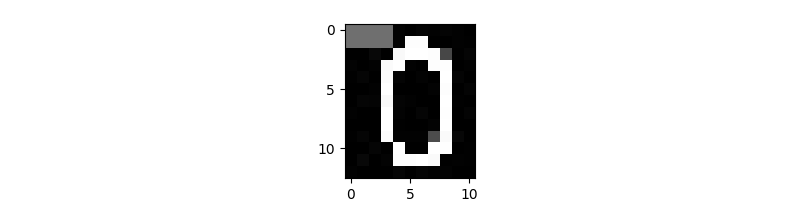

In [13]:
plt::figure_size(800,200);
plt::imshow(testImage);
auto pltImg = displayImage(testImage);
pltImg

### <font style = "color:rgb(8,133,37)">Process</font>

1. First, create a new figure where the image will be displayed.

`plt::figure();`

You can also specify a figure size if you want to view it in a different size than original.

2. Next, display the image using `plt::imshow` function.

`plt::imshow( mat );`

Where, `mat` is the Image to be displayed.

3. Use the `displayImage` helper function to display the image.

`pltImg = displayImage( mat );`

4. Display the image using the following:

`pltImg`

#### <font style = "color:rgb(200,0,0)">Important Points</font>

Some important points to note while using Matplotlibcpp are as follows:

1. Please use `pltImg` as the variable while using `displayImage` function. This is not mandatory but we recommend you to do to avoid any unnecessary confusion.

2. When you are using `pltImg` for the first time in a notebook, make sure you use `auto pltImg` instead. So, when you are displaying an image for the first time in a notebook, use the following:

`auto pltImg = displayImage( mat )`

3. Make sure you do not use a semicolon after `pltImg` for displaying the image. 

4. `pltImg` (step 4 in the process) should be the last line of code written in a cell.

5. You can use the above process **only** in Jupyter Notebooks.

## <font style="color:rgb(50,120,229)">2. OpenCV's imshow</font>
This function will be used when we are running the C++ code from command line.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```cpp
void cv::imshow	(	const String & 	winname,
InputArray 	mat 
)
```
**Parameters**
- **`winname`** - Name of the window.
- **`mat`** - Image to be displayed.

We will use a combination of **`imwrite`** and **markdown** to display the images on notebook.

# <font style="color:rgb(50,120,229)">Additional Display Utility Functions </font>
There are 4 more functions that are present in OpenCV which are commonly used with **`imshow`** function.

## <font style="color:rgb(50,120,229)">1. cv::namedWindow</font>

This function is used to create a display window with a specific name. This name is provided as the first argument of this function. The second argument is a flag which decides whether the window can be **resized** (**`WINDOW_NORMAL`**) or it should be **fixed** to match the image size (**`WINDOW_AUTOSIZE`** - **Default flag**).

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5afdf8410934fd099df85c75b2e0888b)
```cpp
void cv::namedWindow	(	const String & 	winname,
int 	flags = WINDOW_AUTOSIZE 
)
```
**Parameters**
- **`winname`** - Name of the window in the window caption that may be used as a window identifier.
- **`flags`** - Flags of the window

**<font color=green>Can you think of any situation where you would prefer to have a resizable display window?</font>**

## <font style="color:rgb(50,120,229)">2. cv::waitKey</font>

This function is widely used in image as well as video processing. It is a **keyboard binding function**. Its only argument is time in **milliseconds**. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If **0** is passed, it waits **indefinitely** for a key stroke. It can also be set to detect specific key strokes which can be quite useful in video processing applications, as we will see in later sections.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)
```cpp
int cv::waitKey	(	int 	delay = 0	)	
```
**Parameters**
- **`delay`** - Delay in milliseconds. 0 is the special value that means "forever".


## <font style="color:rgb(50,120,229)">3. cv::destroyWindow</font>

This function is used to destroy or close a particular display window. The name of the window is provided as an argument to this function.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga851ccdd6961022d1d5b4c4f255dbab34)
```cpp
void cv::destroyWindow	(	const String & 	winname	)
```
**Parameters**
- **`winname`** - Name of the window to be destroyed

## <font style="color:rgb(50,120,229)">4. cv::destroyAllWindows</font>

This function is used to destroy all display windows. This function does not take any arguments.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)
```cpp
void cv::destroyAllWindows	(		)
```

# <font style="color:rgb(50,120,229)">Write the Image to Disk</font>
In most cases, you would want to save the output of your application. We do this using the imwrite function.


### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)
```cpp
bool cv::imwrite	(	const String & 	filename,
InputArray 	img,
const std::vector< int > & 	params = std::vector< int >() 
)
```
**Parameters**
- **filename** - String providing the relative or absolute path where the image should be saved.
- **img** - Image matrix to be saved.
- **params** - Additional information, like specifying the JPEG compression quality etc. Check the full list [**here**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga292d81be8d76901bff7988d18d2b42ac)

In [14]:
imwrite("../results/test.jpg",testImage);

| <img src="https://www.dropbox.com/s/t3vhxfvsmjmqav4/test.jpg?dl=1" alt="Modified Image" width="300" height="300"/> |
| --- |
| <center>Modified Image</center> |

# <font style="color:rgb(50,120,229)">Color Images</font>
In the previous section, we saw how an image is represented as a 2D Matrix. In this section, we will see how to load color images and discuss a few important points related to color images. 

Let us load a different image this time.
<img src="https://www.dropbox.com/s/odrry84c0w6p6rv/musk.jpg?dl=1" width=400>

In [15]:
// Path of the image to be loaded
// Here we are supplying a relative path
imagePath = DATA_PATH + "/images/musk.jpg";

// Read the image
Mat img = imread(imagePath);

cout << "image size = " << img.size() << endl;
cout << "image channels = " << img.channels();

image size = [600 x 500]
image channels = 3

There area a few things to note here : 

1. The image in this case has 3 dimensions. 
1. The third dimension indicates the number of channels in an image. For most images, this number is 3 ( namely R,G,B ). In some cases, there may be an additional channel (called alpha channel) which contains transparency information of the pixels - More on this later!

# <font style="color:rgb(50,120,229)">Image Channels</font>
As mentioned above, the color image consists of multiple channels. Each channel itself is a grayscale image. **`The combination of intensity values of the three channels gives the color that is displayed on the screen`**. There are many color spaces used in practice and we will discuss some of them in the later sections. Let us have a brief look at the most popular color space - the RGB color space.

In OpenCV, the order of channels R, G and B is reverse. i.e. In the image matrix, the Blue channel is indexed first, followed by the Green Channel and finally the Red Channel. 

### <font style = "color:rgb(8,133,37)">Display the image</font>

| <img src="https://www.dropbox.com/s/odrry84c0w6p6rv/musk.jpg?dl=1" width=400 /> |
| --- |
| <center>Elon Musk</center> |

# <font style="color:rgb(50,120,229)">Splitting and Merging channels </font>
One way of working with the individual channels is using split and merge. We can access the channels using an opencv function `split()` and merge them into a color image using `merge()`. Let us have a look at how it is done.

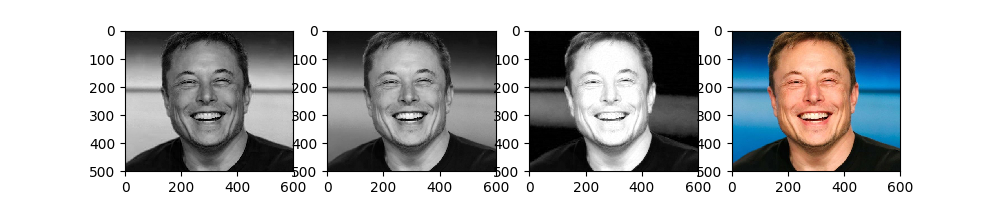

In [16]:
// Show the channels
Mat imgChannels[3];
split(img, imgChannels);

plt::figure_size(1000,200);
plt::subplot(1,4,1);
plt::imshow(imgChannels[0]);
pltImg = displayImage(imgChannels[0]);
plt::subplot(1,4,2);
plt::imshow(imgChannels[1]);
pltImg = displayImage(imgChannels[1]);
plt::subplot(1,4,3);
plt::imshow(imgChannels[2]);
pltImg = displayImage(imgChannels[2]);
plt::subplot(1,4,4);
plt::imshow(img);
pltImg = displayImage(img);
pltImg

#### <font style = "color:rgb(8,133,37)">Observation </font>
We had already mentioned that a white pixel means a high intensity value. If you look at the channels closely and compare them with the original image, you should be able to make out the following observations:
1. We can see in the original image that the background is blue in color. Thus, the blue channel is also having higher intensity values for the bakground, whereas the red channel is almost black for the background.
1. The face is reddish in color and thus, the red channel has very high values in the face region, while the other channels are a bit lower.
1. There is a greenish tint in the original image which is also reflected in the Green channel

This kind of information extraction can be very useful if you want to build basic applications which take decisions based on color ( more so, using specific color channel )

# <font style="color:rgb(50,120,229)">Manipulating Color Pixels</font>

We saw how to access and modify individual pixels for a grayscale image. The same does not hold for color images. As we discussed, the color image has 3 channels, when we access a pixel, we get a tuple/array of values from the 3 channels. Similarly, we need to specify a tuple for changing the values in the color image.

Let us load the grayscale image in color. Note that it still looks the same( black and white ) since all the channels contain the same values.

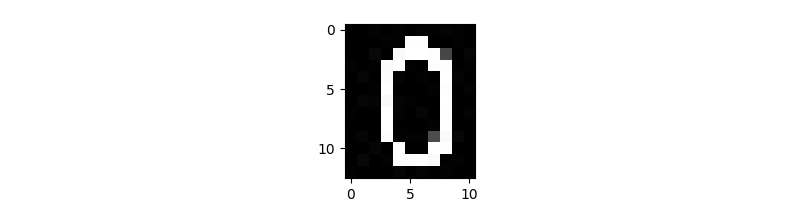

In [17]:
imagePath = DATA_PATH + "/images/number_zero.jpg";
testImage = imread(imagePath,1);

plt::figure_size(800,200);
plt::imshow(testImage);
pltImg = displayImage(testImage);
pltImg

## <font style="color:rgb(50,120,229)">Access Color pixel</font>

In [18]:
cout << testImage.at<Vec3b>(0,0);

[1, 1, 1]

You can see that the intensity value now has 3 elements - one for each channel

## <font style="color:rgb(50,120,229)">Modify Pixels</font>

Let us change the pixel at 
- location [0,0] to Yellow ( It is a mixture of Red and Green )
- location [1,1] to Cyan ( It is a mixture of Blue and Green )
- location [2,2] to Magenta ( It is a mixture of Blue and Red )

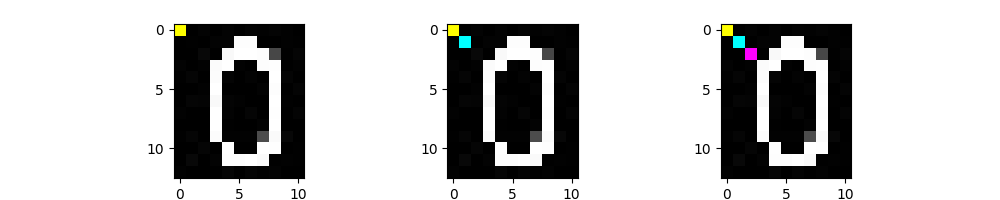

In [19]:
testImage.at<Vec3b>(0,0) = Vec3b(0,255,255);
plt::figure_size(1000,200);
plt::subplot(1,3,1);
plt::imshow(testImage);
pltImg = displayImage(testImage);

testImage.at<Vec3b>(1,1) = Vec3b(255,255,0);
plt::subplot(1,3,2);
plt::imshow(testImage);
pltImg = displayImage(testImage);

testImage.at<Vec3b>(2,2) = Vec3b(255,0,255);
plt::subplot(1,3,3);
plt::imshow(testImage);
pltImg = displayImage(testImage);

pltImg

## <font style="color:rgb(50,120,229)">Modify Region of Interest</font>
Similar to above, we will change the pixels at specific regions as given below. The code is self-explanatory.

In [20]:
testImage(Range(0,3),Range(0,3)).setTo(Scalar(255,0,0));

In [21]:
testImage(Range(3,6),Range(0,3)).setTo(Scalar(0,255,0));
testImage(Range(6,9),Range(0,3)).setTo(Scalar(0,0,255));

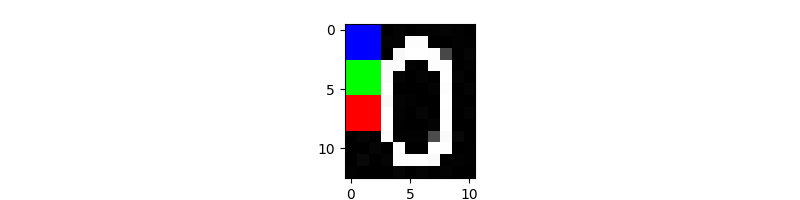

In [22]:
plt::figure_size(800,200);
plt::imshow(testImage);
pltImg = displayImage(testImage);
pltImg

# <font style="color:rgb(50,120,229)">Images with Alpha Channel</font>

In images with an alpha channel, each pixel not only has a color value, but also has a numerical transparency value ( between 0 to 255) that defines what will happen when the pixel is placed over another pixel.

There are 4 channels, i.e. 3 color channels and 1 alpha channel which indicates the transparency.

![](https://www.dropbox.com/s/iid8jet581cavng/panther.png?dl=1)

image size = [640 x 608]
number of channels = 4


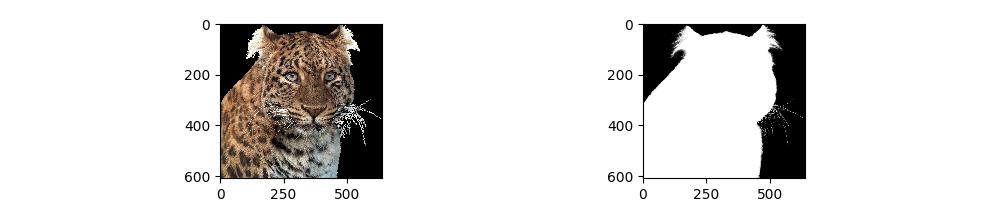

In [23]:
// Path of the PNG image to be loaded
imagePath = DATA_PATH + "/images/panther.png";

// Read the image
// Note that we are passing flag = -1 while reading the image ( it will read the image as is)
Mat imgPNG = imread(imagePath,-1);
cout << "image size = " << imgPNG.size() << endl;
cout << "number of channels = " << imgPNG.channels() << endl;

Mat imgBGR;
Mat imgPNGChannels[4];
split(imgPNG,imgPNGChannels);

merge(imgPNGChannels,3,imgBGR);

Mat imgMask = imgPNGChannels[3];

plt::figure_size(1000,200);
plt::subplot(1,2,1);
plt::imshow(imgBGR);
pltImg = displayImage(imgBGR);
plt::subplot(1,2,2);
plt::imshow(imgMask);
pltImg = displayImage(imgMask);
pltImg

You can see the whiskers very clearly in the mask image. The alpha mask is basically a very accurate segmentation of the image. It is useful for creating overlays ( Augmented Reality type of applications ). If you don't have tha alpha mask, then you have to separate out the whiskers from the white background ( see original image above ) which can be very difficult.

You will create a fun application using alpha mask and PNG image in the next section.